<a href="https://colab.research.google.com/github/adarshukla3005/MachineLearning/blob/main/EDA_Analysis_IBY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload the zip file
uploaded = files.upload()

Saving 1.zip to 1.zip


In [2]:
import zipfile
import os

# Assuming the uploaded file name is 'data.zip'
zip_file_path = '1.zip'

# Create a directory to extract the files
extraction_path = '/content/data'
os.makedirs(extraction_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# List the extracted files
extracted_files = os.listdir(extraction_path)
print(extracted_files)

['emotion_data', 'transcript_data', 'transcripts']


In [13]:
import os
import pandas as pd

# Define the path to the Emotion folder
emotion_data_path = os.path.join(extraction_path, 'emotion_data')

# Load emotion, gaze, and metadata for each candidate
emotion_dfs = {}
gaze_dfs = {}
metadata_dfs = {}

for candidate_folder in os.listdir('/content/data/emotion_data'):
    candidate_path = os.path.join('/content/data/emotion_data', candidate_folder)
    if os.path.isdir(candidate_path):
        # Load emotion, gaze, and metadata data from CSV files
        emotion_file = os.path.join(candidate_path, 'emotion.csv')  # Adjust filename
        gaze_file = os.path.join(candidate_path, 'gaze.csv')        # Adjust filename
        metadata_file = os.path.join(candidate_path, 'metadata.csv')    # Adjust filename

        # Read the CSV files into DataFrames
        emotion_dfs[candidate_folder] = pd.read_csv(emotion_file)
        gaze_dfs[candidate_folder] = pd.read_csv(gaze_file)
        metadata_dfs[candidate_folder] = pd.read_csv(metadata_file)

# Display a sample of emotion data for one candidate
print(emotion_dfs[list(emotion_dfs.keys())[0]].head())

                               movie_id  image_seq      angry   disgust  \
0  baa26895-85b2-465b-a972-649b41d9870e          0   4.903760  0.000024   
1  baa26895-85b2-465b-a972-649b41d9870e          1   0.179621  0.000185   
2  baa26895-85b2-465b-a972-649b41d9870e          2  10.126300  0.087004   
3  baa26895-85b2-465b-a972-649b41d9870e          3  37.344900  0.427457   
4  baa26895-85b2-465b-a972-649b41d9870e          4   0.003088  0.000003   

       fear     happy       sad   surprise    neutral dominant_emotion  
0  1.847580   2.55923  48.79130   0.033327  41.864800              sad  
1  0.055258  93.56640   6.18999   0.001184   0.007402            happy  
2  6.057070  42.70380  19.81920  15.360900   5.845700            happy  
3  2.784040  16.53680  35.73190   0.534506   6.640390            angry  
4  0.002681  98.51810   1.47585   0.000055   0.000212            happy  


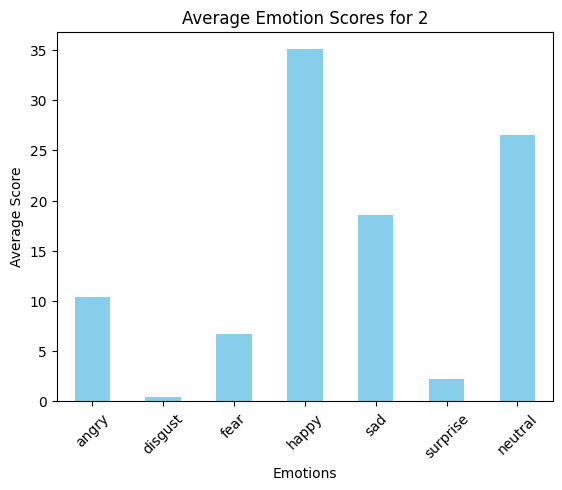

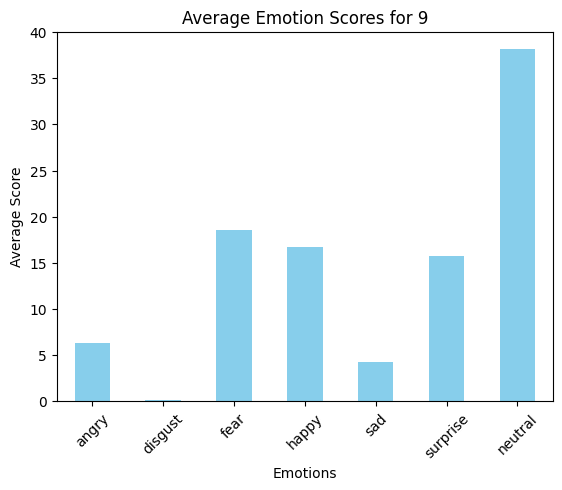

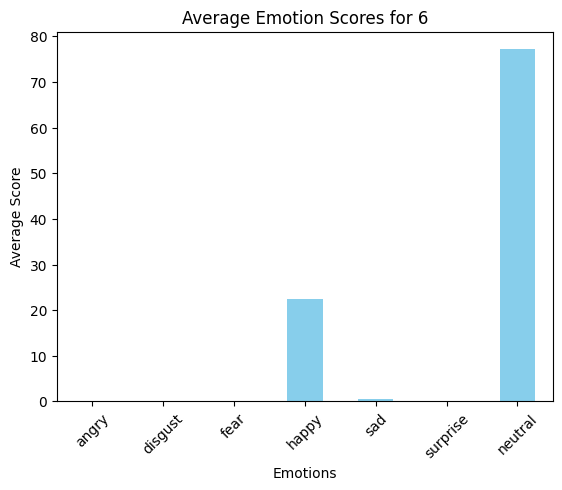

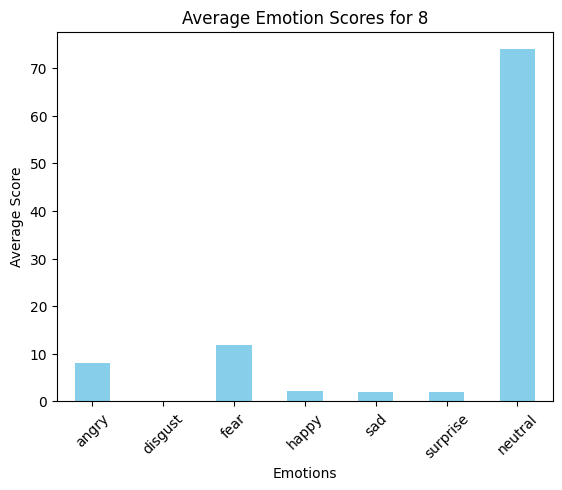

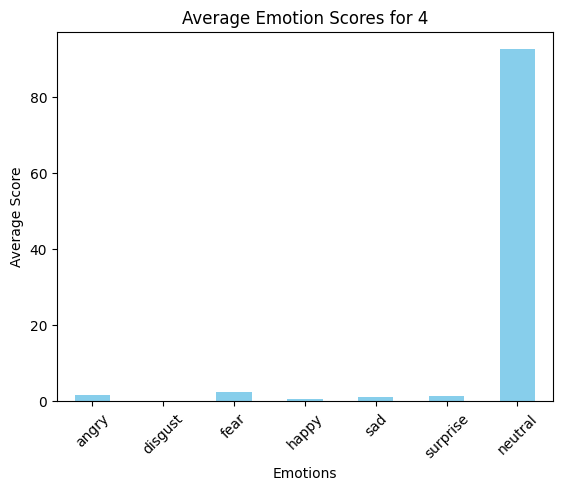

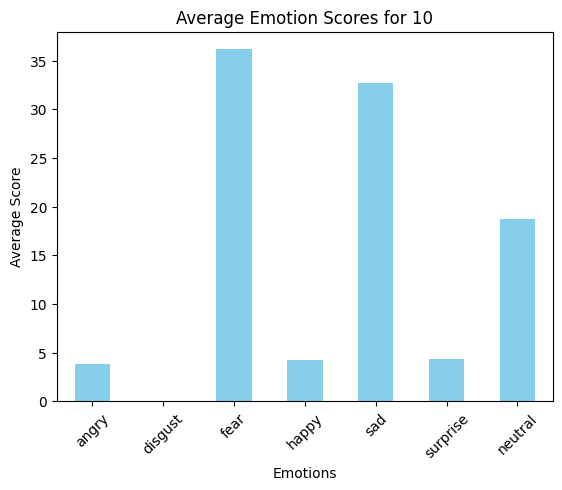

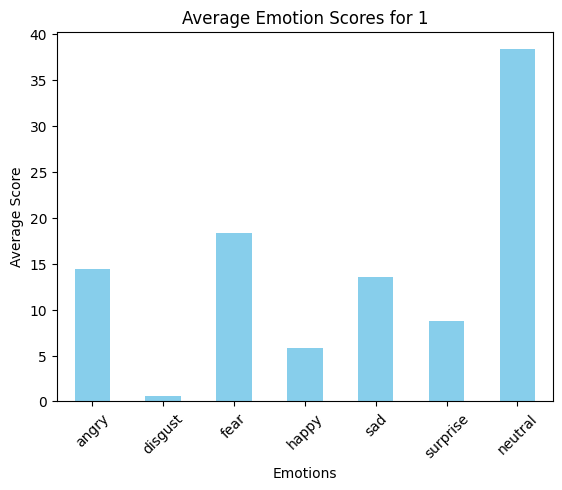

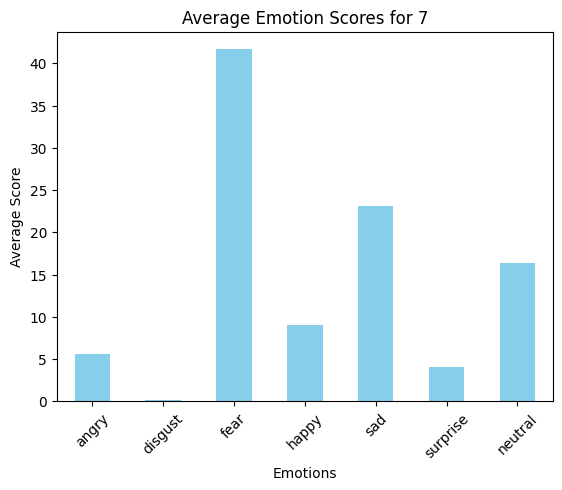

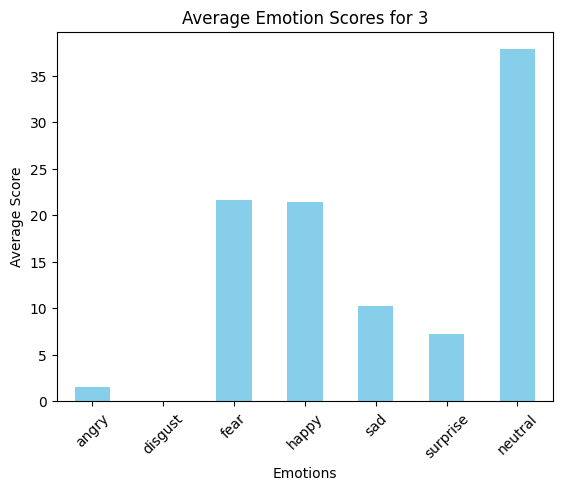

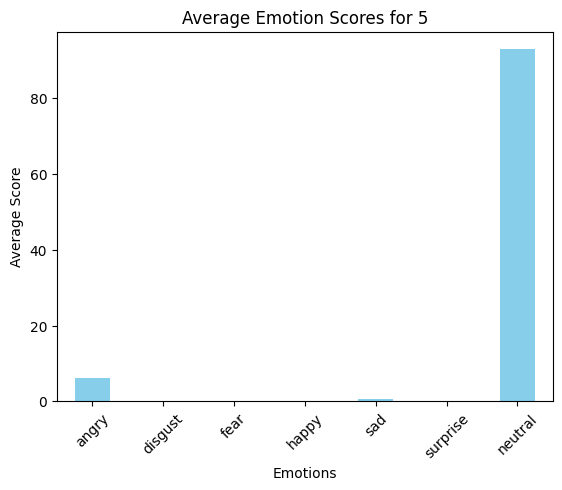

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot emotion distributions
def plot_emotion_distribution(emotion_df, candidate_id):
    emotion_cols = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    emotion_df[emotion_cols].mean().plot(kind='bar', color='skyblue')
    plt.title(f'Average Emotion Scores for {candidate_id}')
    plt.ylabel('Average Score')
    plt.xlabel('Emotions')
    plt.xticks(rotation=45)
    plt.show()

# Analyze for each candidate
for candidate_id, df in emotion_dfs.items():
    plot_emotion_distribution(df, candidate_id)

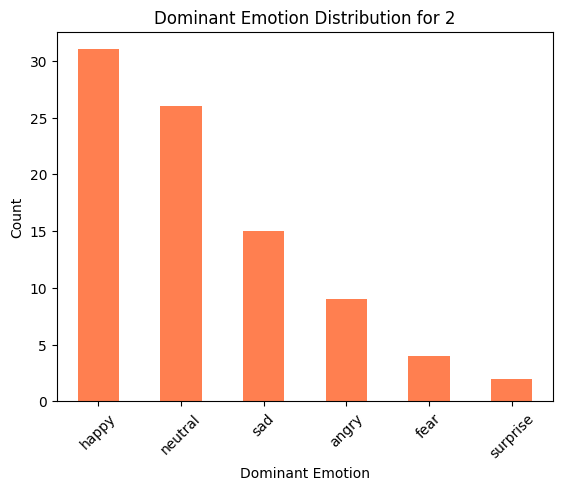

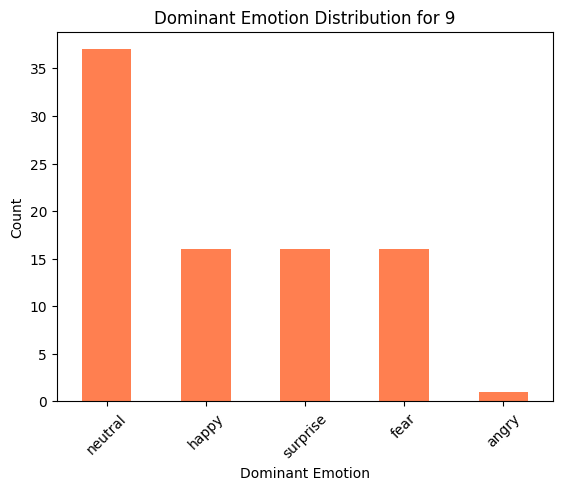

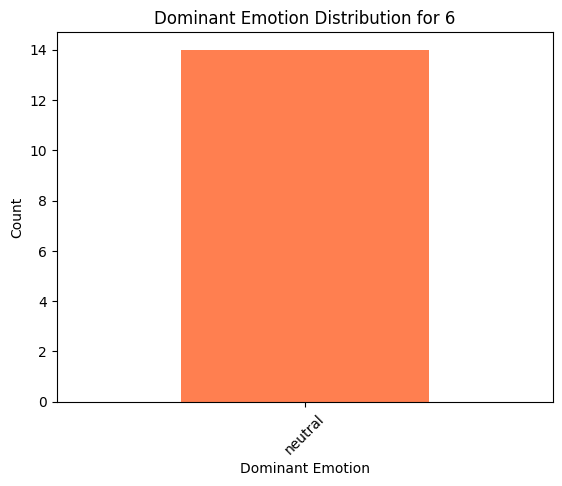

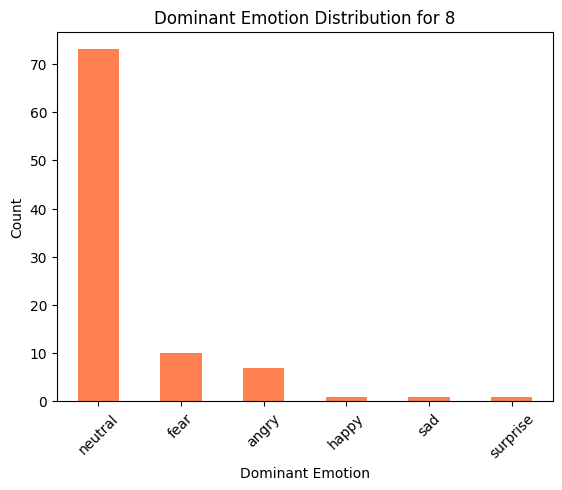

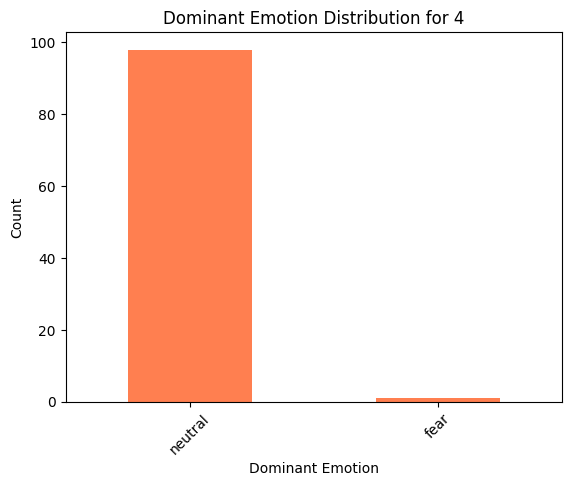

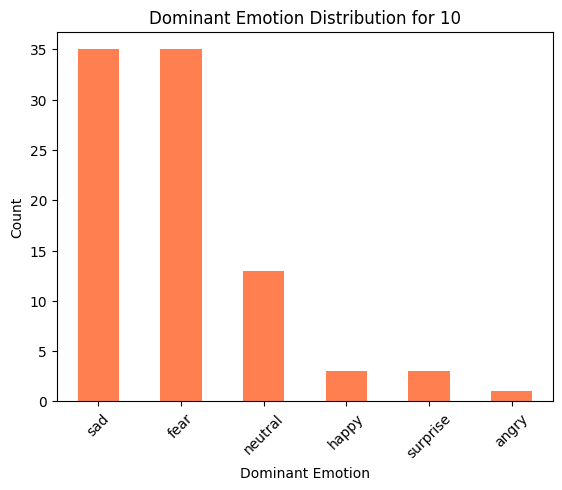

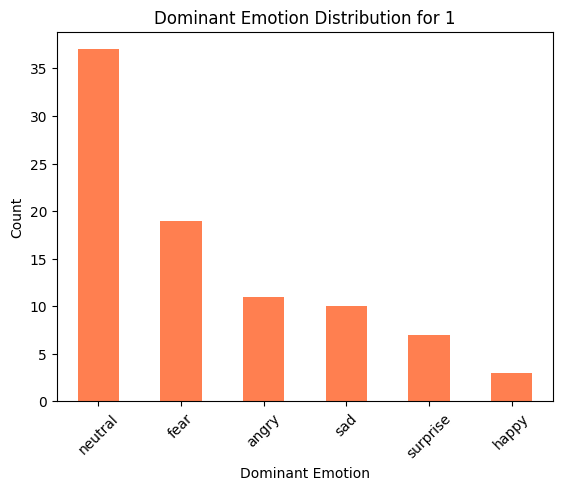

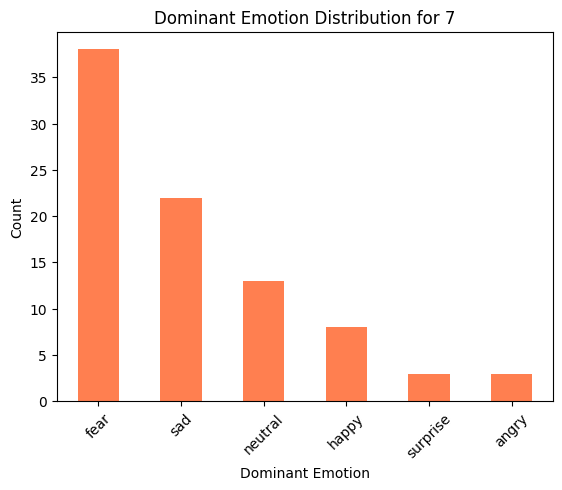

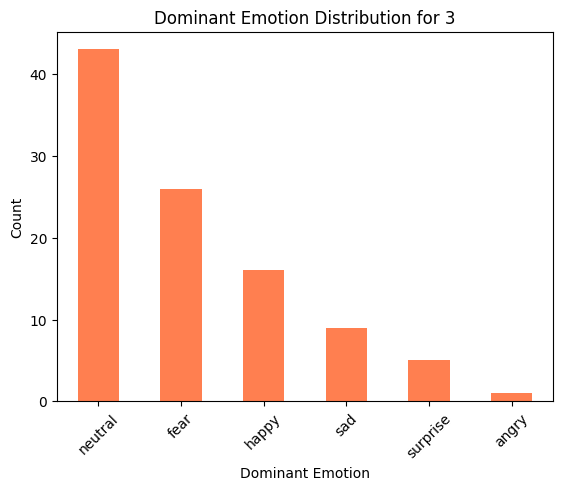

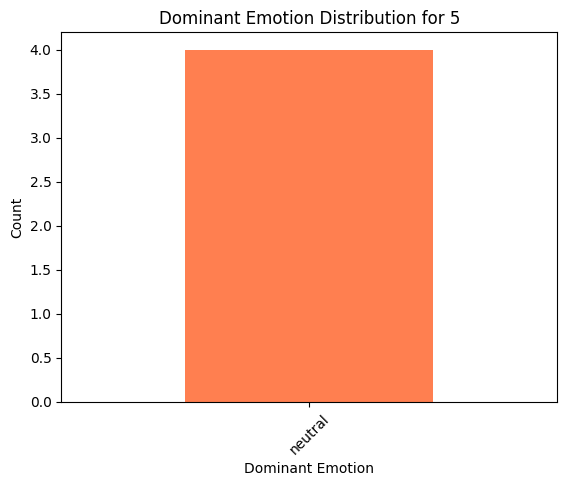

In [18]:
# Function to analyze the dominant emotion
def dominant_emotion_analysis(emotion_df, candidate_id):
    dominant_counts = emotion_df['dominant_emotion'].value_counts()
    dominant_counts.plot(kind='bar', color='coral')
    plt.title(f'Dominant Emotion Distribution for {candidate_id}')
    plt.ylabel('Count')
    plt.xlabel('Dominant Emotion')
    plt.xticks(rotation=45)
    plt.show()

# Analyze for each candidate
for candidate_id, df in emotion_dfs.items():
    dominant_emotion_analysis(df, candidate_id)

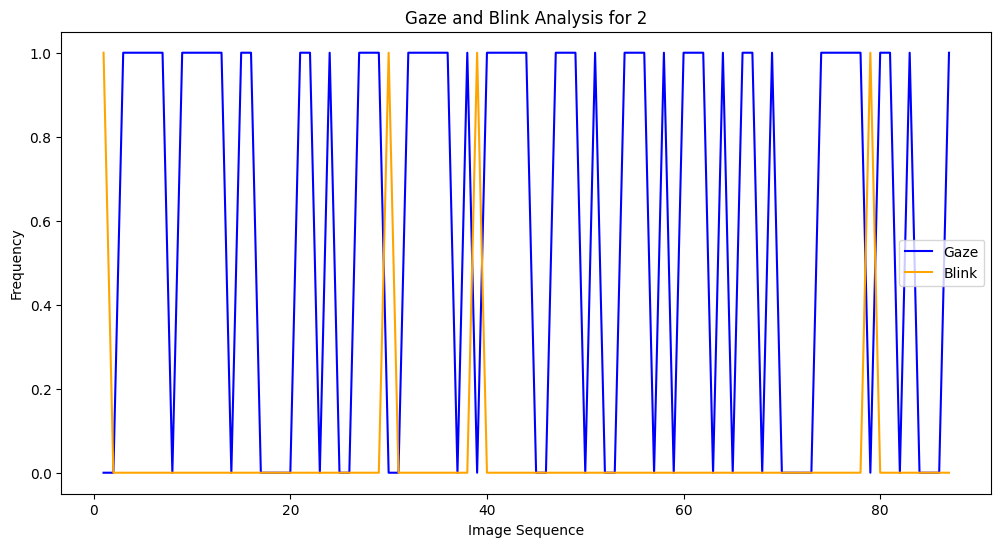

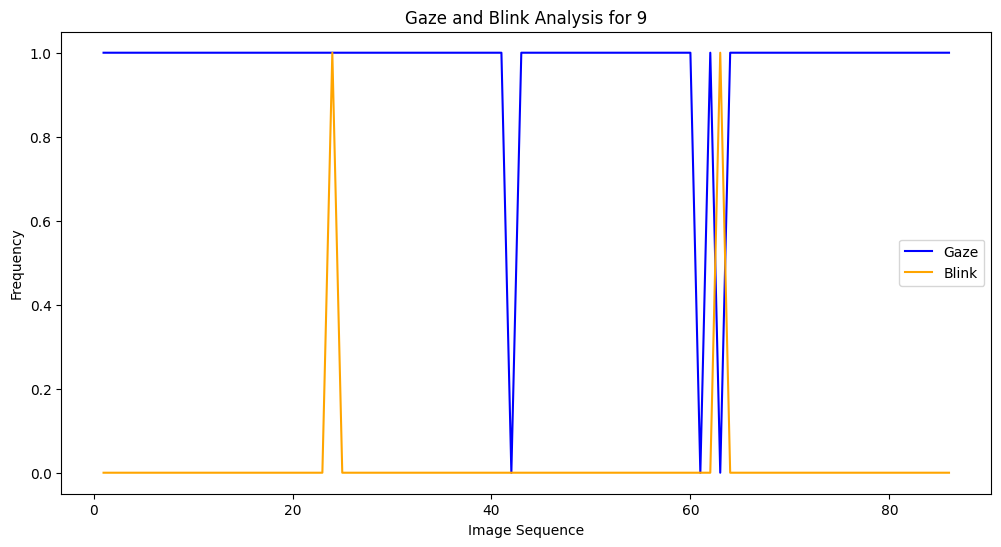

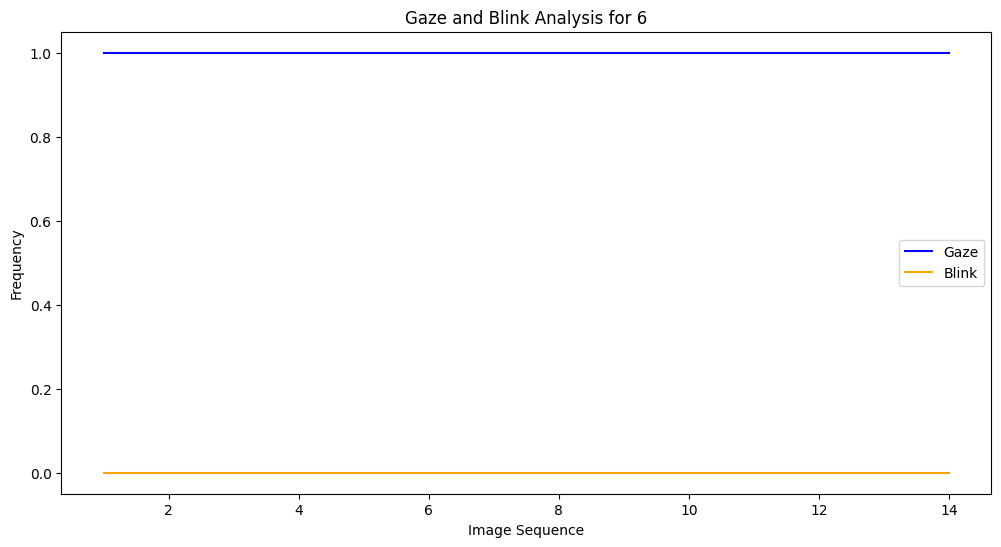

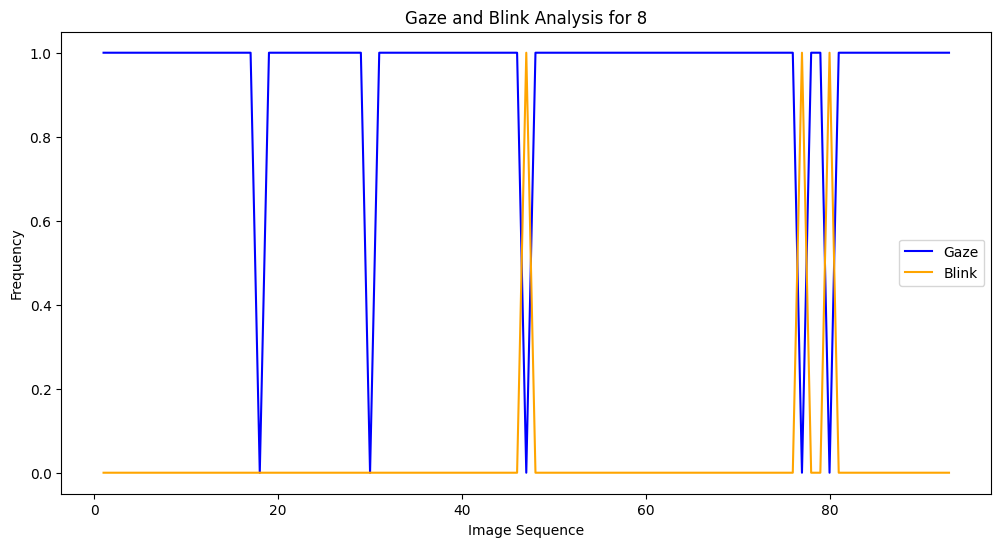

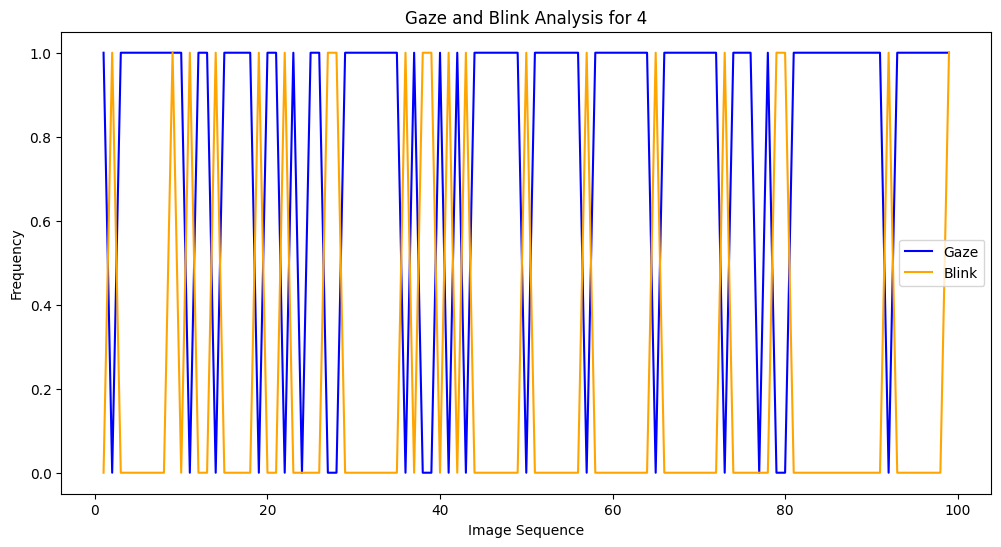

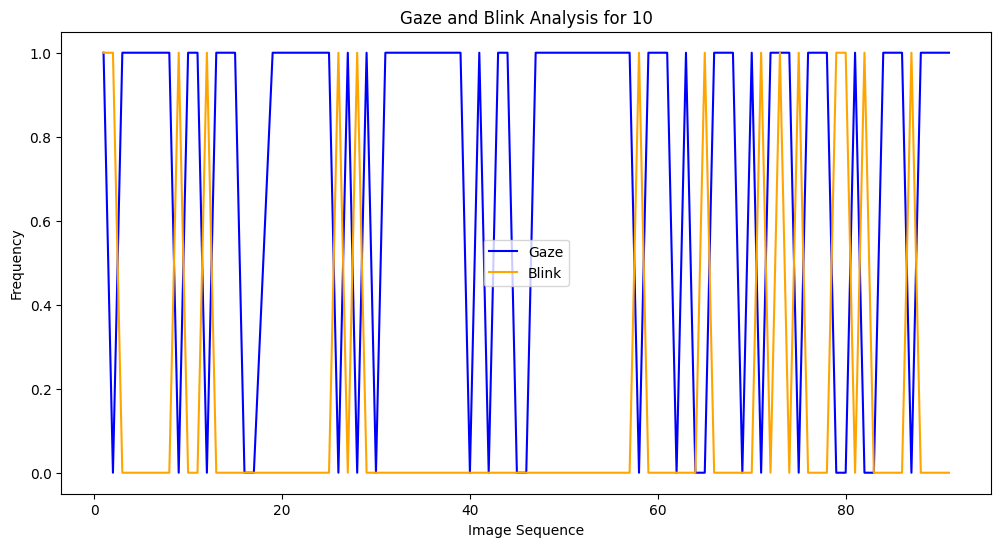

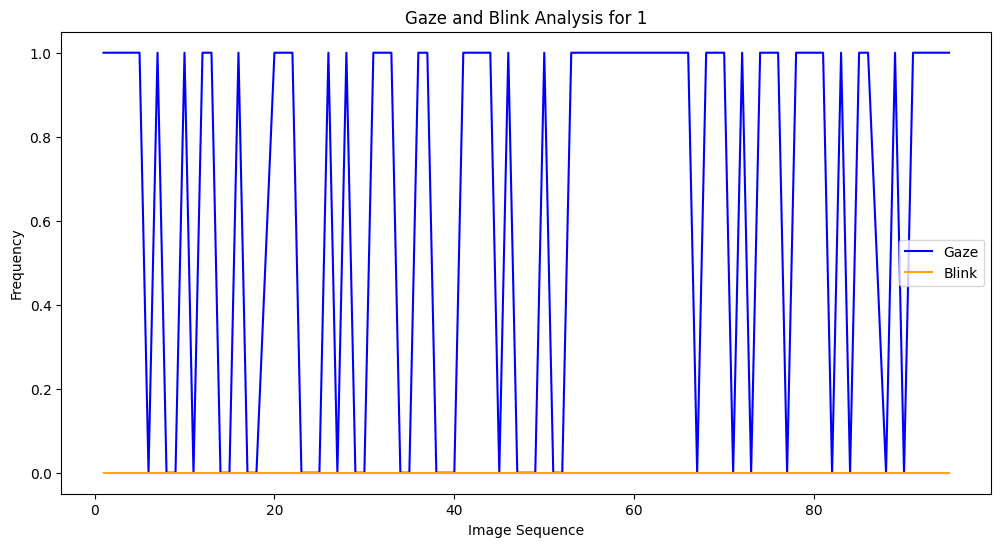

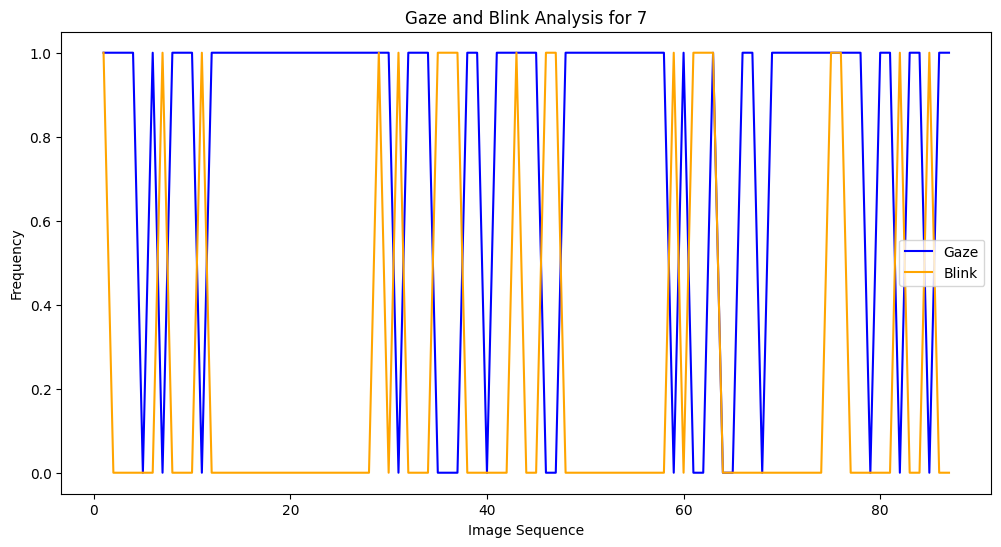

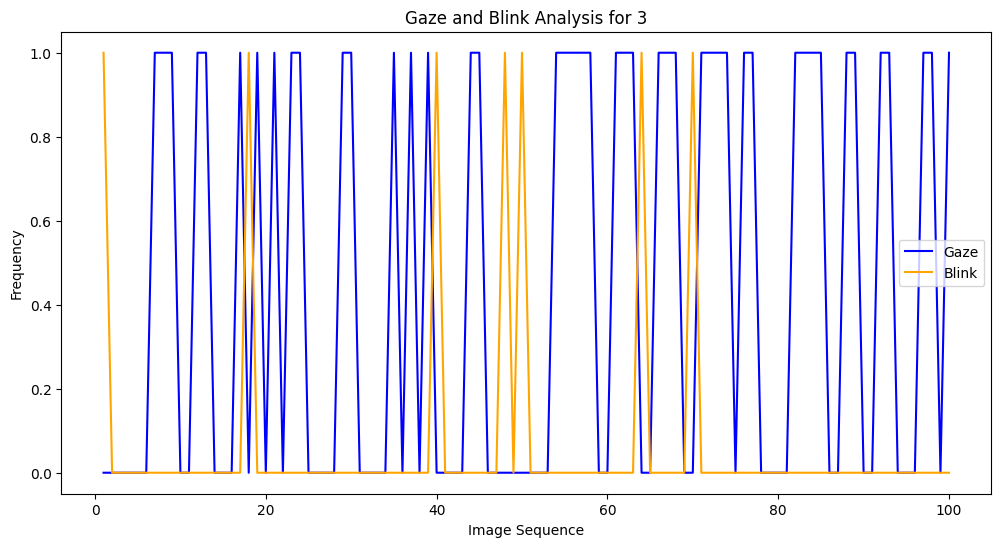

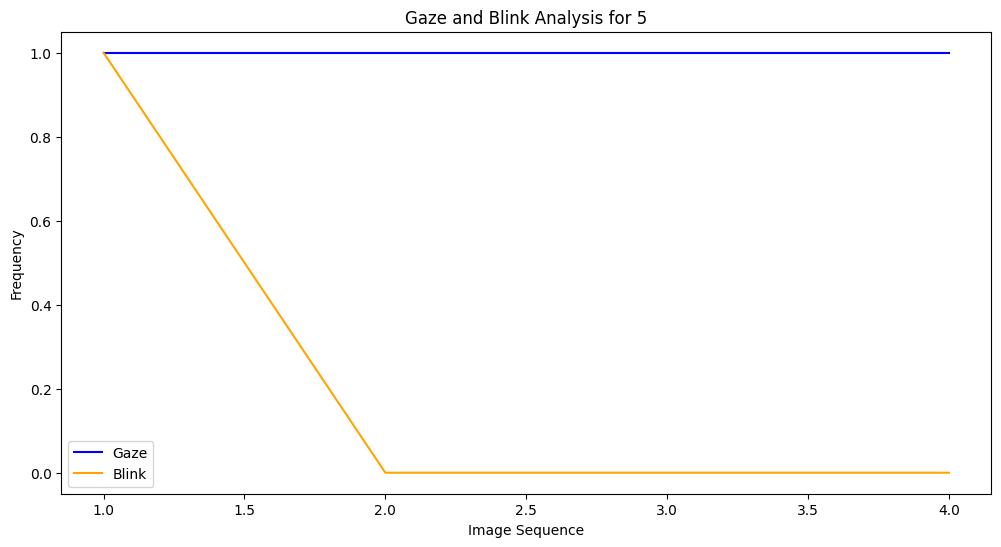

In [19]:
# Function to analyze gaze and blink frequency
def gaze_analysis(gaze_df, candidate_id):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=gaze_df, x='image_seq', y='gaze', label='Gaze', color='blue')
    sns.lineplot(data=gaze_df, x='image_seq', y='blink', label='Blink', color='orange')
    plt.title(f'Gaze and Blink Analysis for {candidate_id}')
    plt.xlabel('Image Sequence')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Analyze for each candidate
for candidate_id, df in gaze_dfs.items():
    gaze_analysis(df, candidate_id)

In [16]:
# Define the path to the Transcript Scores folder
transcript_scores_path = os.path.join(extraction_path, 'transcript_data')

# Load transcript scores for each candidate
transcript_dfs = {}

for transcript_file in os.listdir(transcript_scores_path):
    candidate_id = transcript_file.split('.')[0]  # Assuming filename is candidate_id.xlsx
    transcript_dfs[candidate_id] = pd.read_csv(os.path.join(transcript_scores_path, transcript_file))

# Display a sample of transcript scores for one candidate
print(transcript_dfs[list(transcript_dfs.keys())[0]].head())

   id  seek  start    end                                               text  \
0   0     0   0.00   6.04   My name is Michael Ramos, I am from Patna, Bi...   
1   1     0   6.04  12.08   I went up to do my graduation in B.Com Honour...   
2   2     0  12.08  16.68   as well as a Tax Associate wherein I got the ...   
3   3     0  16.68  22.56   learned in my B.Com to apply them in real lif...   
4   4     0  22.56  26.76   been involved in a lot of extracurricular act...   

                                              tokens  temperature  \
0  [50364, 1222, 1315, 307, 49328, 2786, 11, 286,...          0.0   
1  [50666, 286, 1437, 493, 281, 360, 452, 15652, ...          0.0   
2  [50968, 382, 731, 382, 257, 23263, 28520, 4353...          0.0   
3  [51198, 3264, 294, 452, 363, 13, 14627, 281, 3...          0.0   
4  [51492, 668, 3288, 294, 257, 688, 295, 1279, 1...          0.0   

   avg_logprob  compression_ratio  no_speech_prob  positive  negative  \
0    -0.331398           1.6227

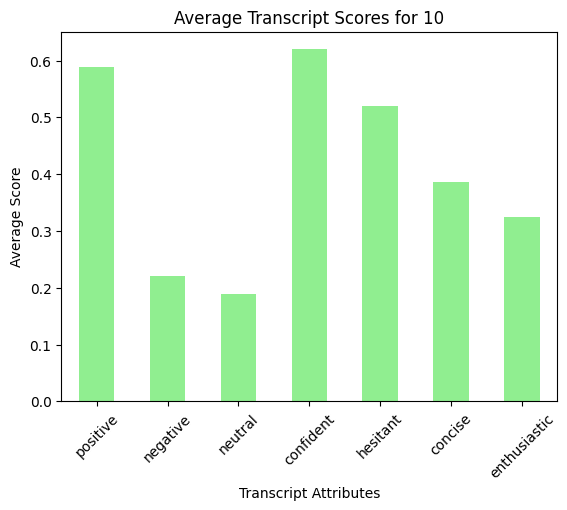

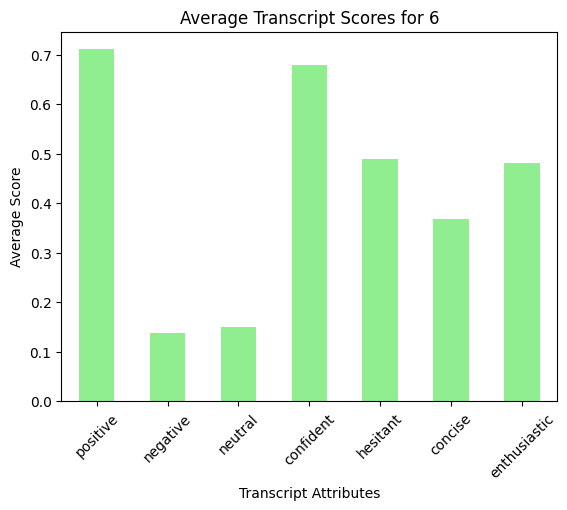

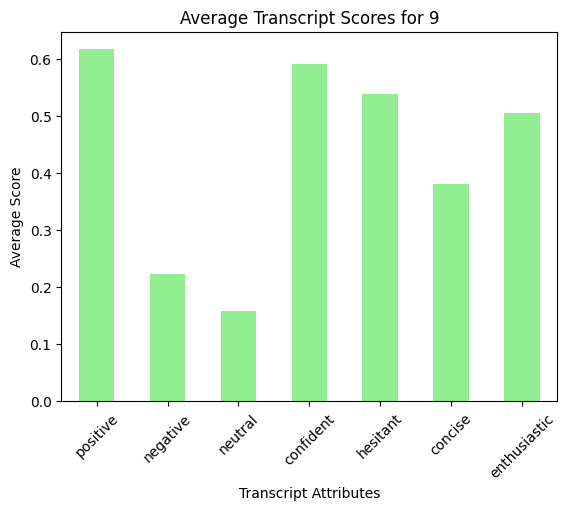

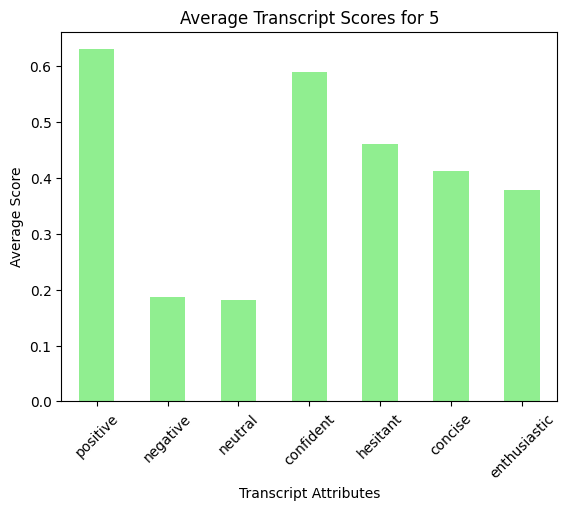

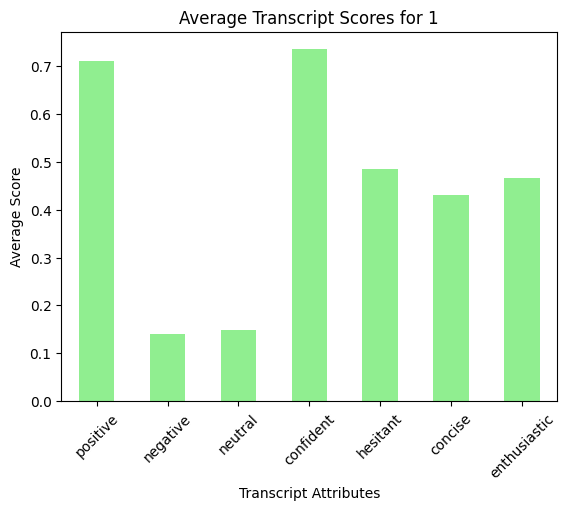

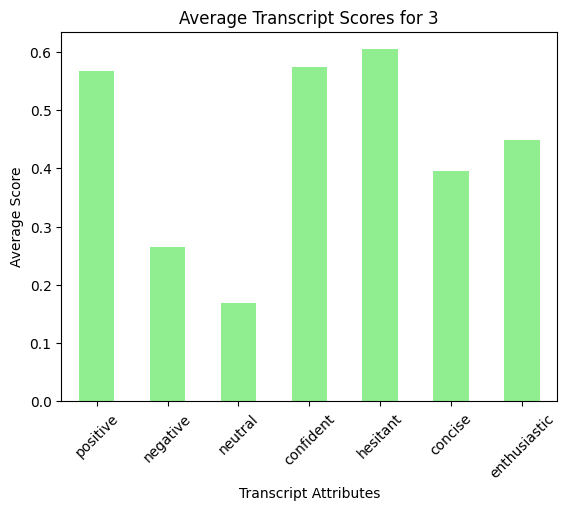

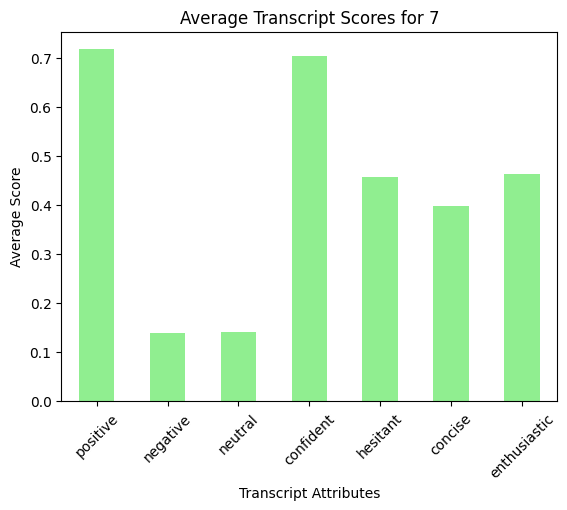

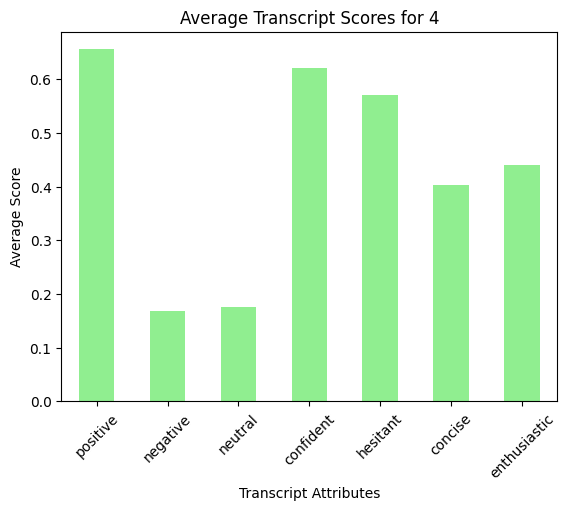

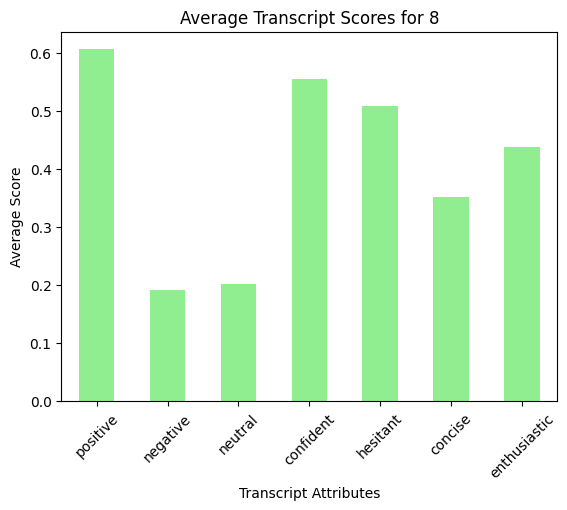

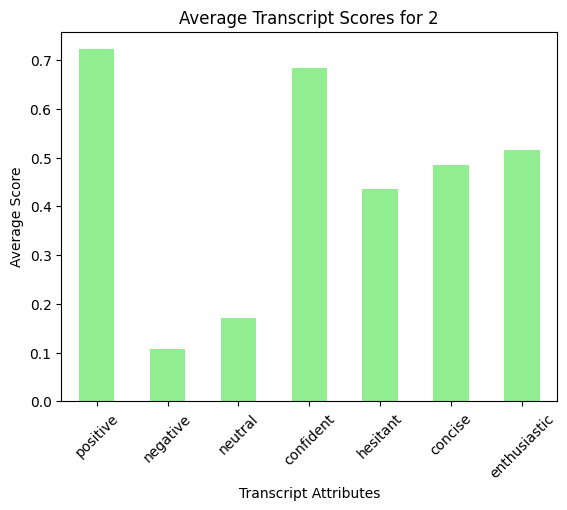

In [20]:
# Function to plot transcript score distributions
def transcript_score_distribution(transcript_df, candidate_id):
    score_cols = ['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic']
    transcript_df[score_cols].mean().plot(kind='bar', color='lightgreen')
    plt.title(f'Average Transcript Scores for {candidate_id}')
    plt.ylabel('Average Score')
    plt.xlabel('Transcript Attributes')
    plt.xticks(rotation=45)
    plt.show()

# Analyze for each candidate
for candidate_id, df in transcript_dfs.items():
    transcript_score_distribution(df, candidate_id)

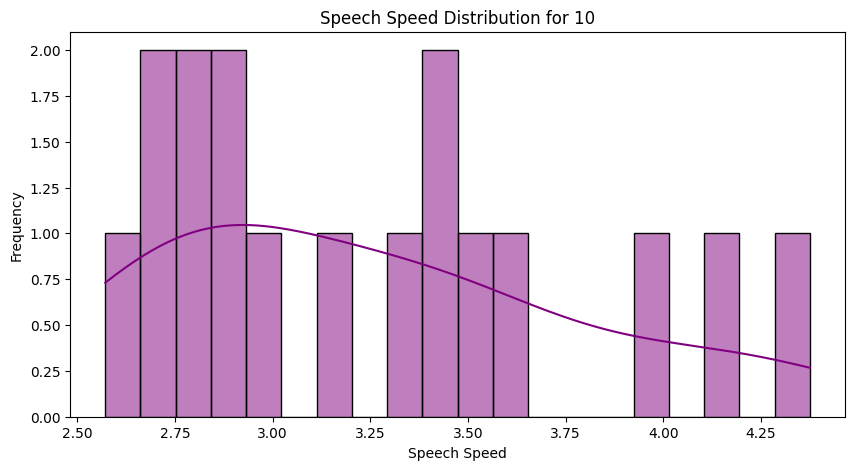

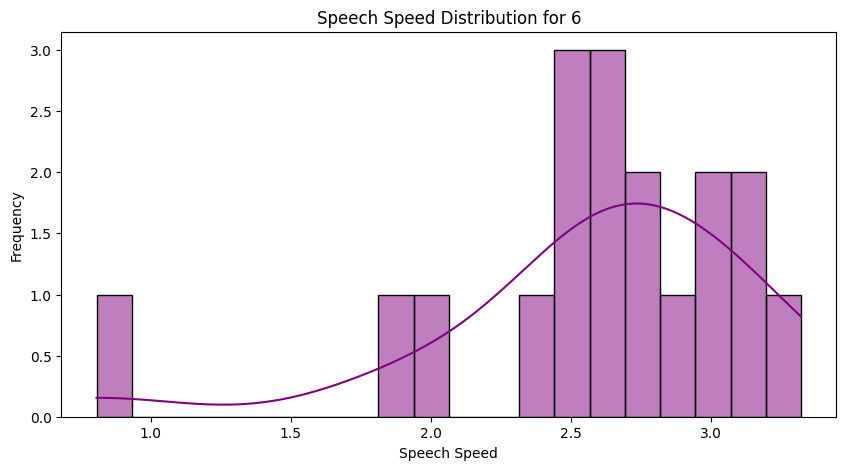

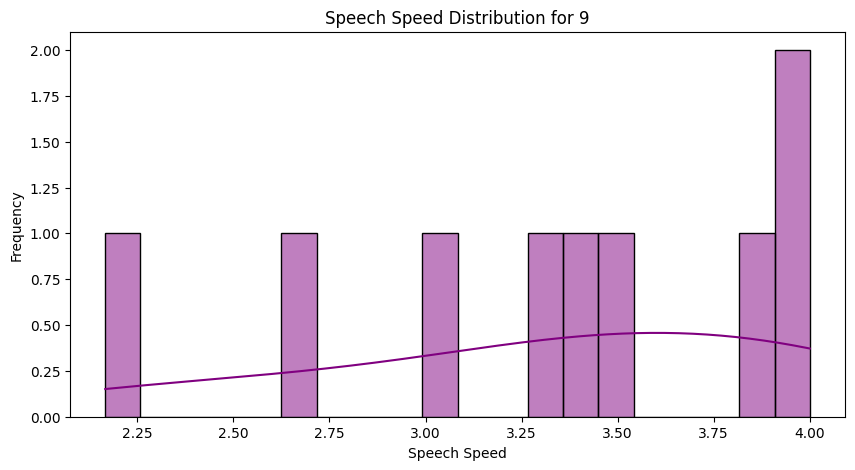

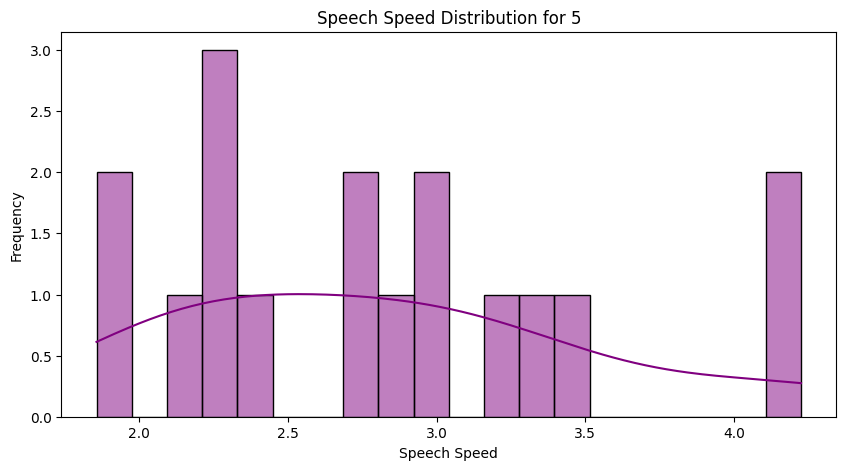

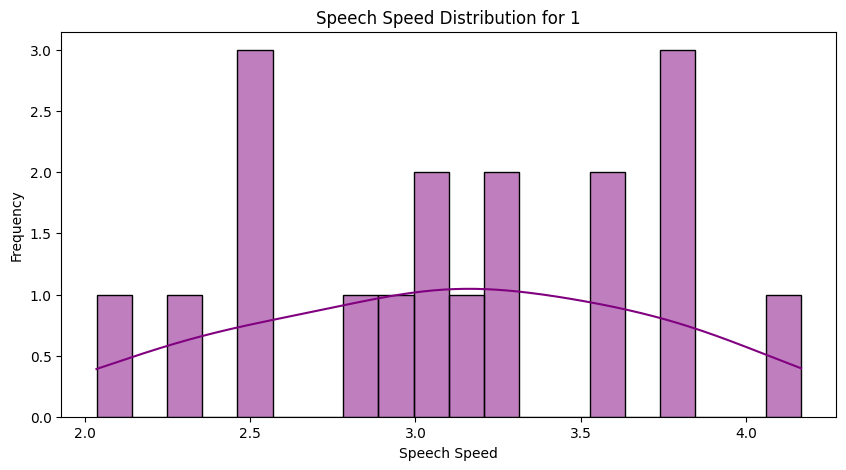

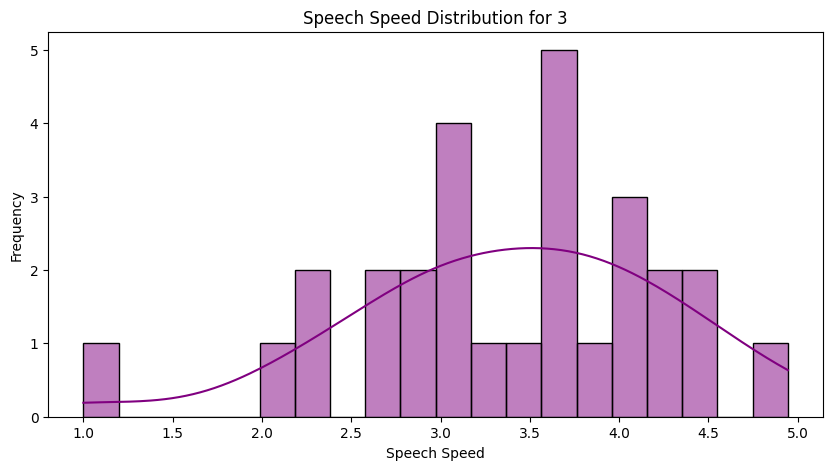

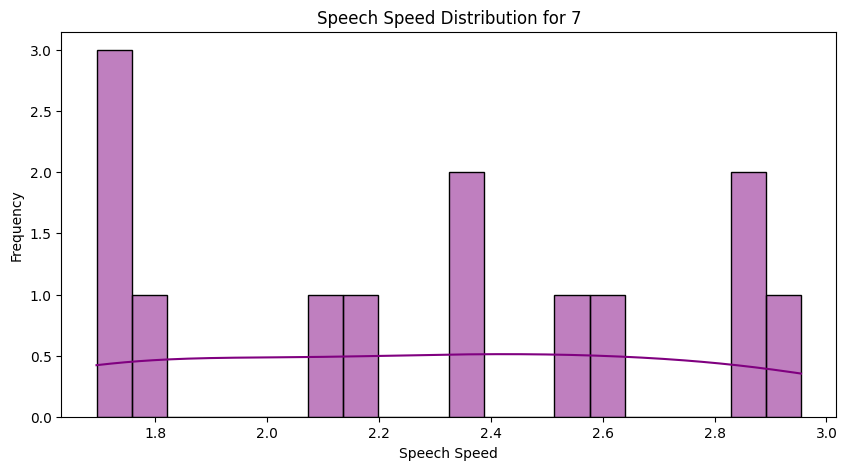

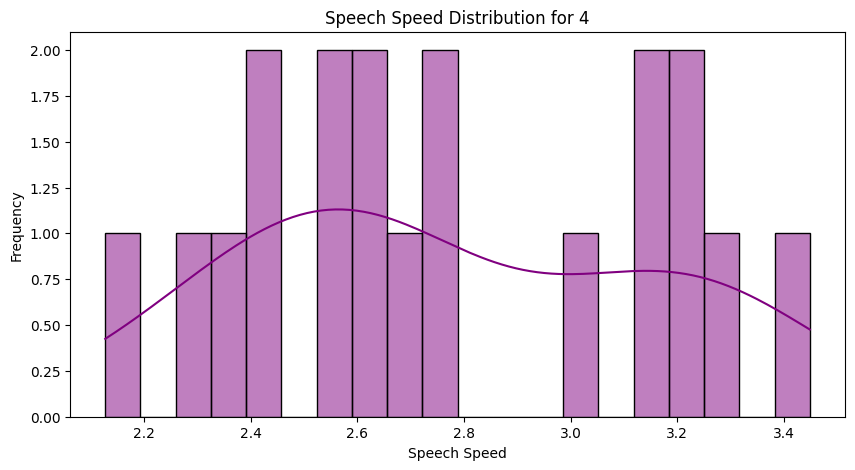

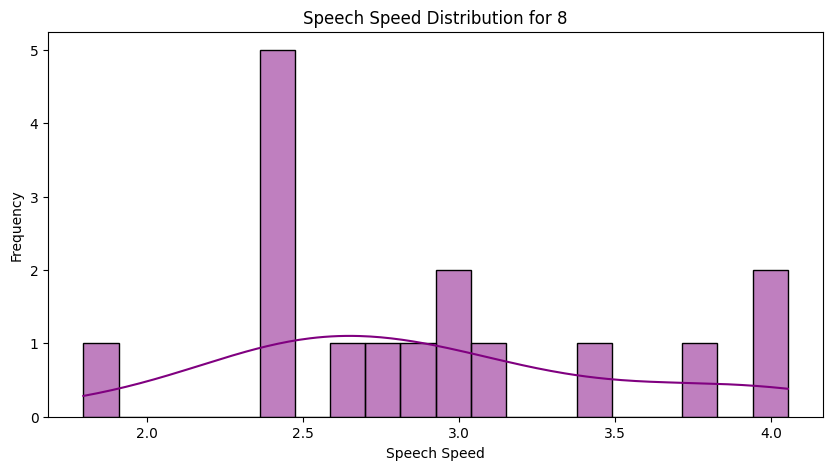

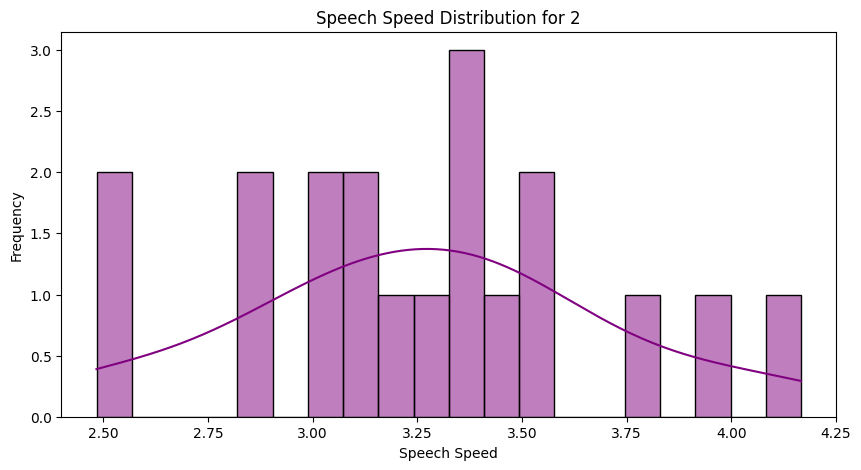

In [21]:
# Function to analyze speech speed
def speech_speed_analysis(transcript_df, candidate_id):
    plt.figure(figsize=(10, 5))
    sns.histplot(transcript_df['speech_speed'], bins=20, kde=True, color='purple')
    plt.title(f'Speech Speed Distribution for {candidate_id}')
    plt.xlabel('Speech Speed')
    plt.ylabel('Frequency')
    plt.show()

# Analyze for each candidate
for candidate_id, df in transcript_dfs.items():
    speech_speed_analysis(df, candidate_id)

In [30]:
import os
import nltk
from nltk import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the necessary NLTK data
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze transcripts
def analyze_transcript(transcript_path, candidate_id):
    with open(transcript_path, 'r') as f:
        original_transcript = f.read()

    sentences = sent_tokenize(original_transcript)
    print(f"Key Sentences from {candidate_id} Transcript:")

    # Display first 5 sentences and perform sentiment analysis
    for sentence in sentences[:5]:
        sentiment_scores = sia.polarity_scores(sentence)
        print(f"- {sentence} (Sentiment: {sentiment_scores})")

# Path to the Transcripts folder
transcripts_path = os.path.join(extraction_path, 'transcripts')

# Analyze for each candidate
for transcript_file in os.listdir(transcripts_path):
    candidate_id = transcript_file.split('.')[0]  # Assuming filename is candidate_id.txt
    transcript_path = os.path.join(transcripts_path, transcript_file)
    analyze_transcript(transcript_path, candidate_id)

Key Sentences from 3 Transcript:
-  My name is Michael Guzman and I am 21 years old. (Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0})
- Hailing from a small family in Varanasi, I had been there most of my life, but MBA has  given me the experience of living alone for the first time, which has been quite tough  and challenging for me. (Sentiment: {'neg': 0.117, 'neu': 0.825, 'pos': 0.057, 'compound': -0.3386})
- I completed my school being one of the top students of my batch and also being a part  of the school student council as the activity head of the school. (Sentiment: {'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.2023})
- Later on, I gave the undergraduate entrance exam of BHU securing a rank in the top 1.2%  and pursued to become honours from Varanasi University, but unfortunately, due to COVID-19,  most of my college life was spent online. (Sentiment: {'neg': 0.077, 'neu': 0.795, 'pos': 0.128, 'compound': 0.0129})
- During my very day days when I had t

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
# Summary of Findings
summary = {
    "Candidates": {},
}

for candidate_id in emotion_dfs.keys():
    # Store insights for each candidate
    summary["Candidates"][candidate_id] = {
        "Average Emotions": emotion_dfs[candidate_id][['happy', 'sad', 'angry', 'fear', 'surprise']].mean().to_dict(),
        "Dominant Emotion": emotion_dfs[candidate_id]['dominant_emotion'].mode()[0],
        "Average Positive Score": transcript_dfs[candidate_id]['positive'].mean(),
        "Average Speech Speed": transcript_dfs[candidate_id]['speech_speed'].mean(),
    }

# Display the summary
print(summary)

{'Candidates': {'2': {'Average Emotions': {'happy': 35.063288345977014, 'sad': 18.55839076, 'angry': 10.395040800995405, 'fear': 6.747535936875746, 'surprise': 2.2673299483980696}, 'Dominant Emotion': 'happy', 'Average Positive Score': 0.7220063585984079, 'Average Speech Speed': 3.269092112382821}, '9': {'Average Emotions': {'happy': 16.73419038976744, 'sad': 4.293062573953489, 'angry': 6.337653969069766, 'fear': 18.602679712790692, 'surprise': 15.761100954767443}, 'Dominant Emotion': 'neutral', 'Average Positive Score': 0.6173526421189308, 'Average Speech Speed': 3.3299382716049384}, '6': {'Average Emotions': {'happy': 22.36365785714285, 'sad': 0.43651214285714285, 'angry': 0.004149573357142857, 'fear': 0.035453167142857143, 'surprise': 0.004706990642857143}, 'Dominant Emotion': 'neutral', 'Average Positive Score': 0.7111822979317771, 'Average Speech Speed': 2.583163463330654}, '8': {'Average Emotions': {'happy': 2.1203668107526883, 'sad': 1.9552314158064517, 'angry': 8.11533917634408

In [32]:
import pandas as pd

# Summary dictionary
summary = {
    "Candidates": {},
}

# Collect key findings for each candidate
for candidate_id in emotion_dfs.keys():
    summary["Candidates"][candidate_id] = {
        "Average Happy": emotion_dfs[candidate_id]['happy'].mean(),
        "Average Sad": emotion_dfs[candidate_id]['sad'].mean(),
        "Average Angry": emotion_dfs[candidate_id]['angry'].mean(),
        "Average Fear": emotion_dfs[candidate_id]['fear'].mean(),
        "Average Surprise": emotion_dfs[candidate_id]['surprise'].mean(),
        "Dominant Emotion": emotion_dfs[candidate_id]['dominant_emotion'].mode()[0],
        "Average Positive Score": transcript_dfs[candidate_id]['positive'].mean(),
        "Average Speech Speed": transcript_dfs[candidate_id]['speech_speed'].mean(),
    }

# Convert the summary into a DataFrame for better readability
summary_df = pd.DataFrame.from_dict(summary["Candidates"], orient='index')

# Display the DataFrame
print(summary_df)

    Average Happy  Average Sad  Average Angry  Average Fear  Average Surprise  \
2       35.063288    18.558391      10.395041      6.747536          2.267330   
9       16.734190     4.293063       6.337654     18.602680         15.761101   
6       22.363658     0.436512       0.004150      0.035453          0.004707   
8        2.120367     1.955231       8.115339     11.939264          1.901795   
4        0.572650     1.057942       1.734140      2.602291          1.403702   
10       4.215283    32.656818       3.856539     36.143804          4.330881   
1        5.865318    13.575324      14.451059     18.382797          8.744969   
7        8.994113    23.106425       5.641183     41.652400          4.081041   
3       21.428420    10.295898       1.531082     21.633298          7.268728   
5        0.101414     0.654111       6.261661      0.202875          0.008069   

   Dominant Emotion  Average Positive Score  Average Speech Speed  
2             happy                0.722

In [36]:
# Convert the summary into a DataFrame
summary_df = pd.DataFrame.from_dict(summary["Candidates"], orient='index')

# Save the DataFrame to a CSV file
csv_path = os.path.join(extraction_path, 'candidate_summary.csv')
summary_df.to_csv(csv_path, index=True)

# Display a confirmation message
print(f"Summary saved as CSV at: {csv_path}")

Summary saved as CSV at: /content/data/candidate_summary.csv


In [37]:
# Sample data structure for candidates
candidate_summary = [
    {"Candidate ID": "C1", "Average Happy": 0.6, "Average Sad": 0.1, "Average Angry": 0.1,
     "Average Fear": 0.1, "Average Surprise": 0.4, "Dominant Emotion": "Happy",
     "Average Positive Score": 0.7, "Average Speech Speed": 150},
    # Add other candidates here...
]

# Function to evaluate candidates
def evaluate_candidates(candidate_summary):
    results = []

    for candidate in candidate_summary:
        decision = "Not Recommended"
        reasons = []

        # Evaluate emotional scores
        if (candidate["Average Happy"] > 0.5 and
            candidate["Average Sad"] < 0.2 and
            candidate["Average Angry"] < 0.2 and
            candidate["Average Fear"] < 0.2 and
            candidate["Average Surprise"] > 0.3):
            reasons.append("Positive emotional scores.")

        # Evaluate dominant emotion
        if candidate["Dominant Emotion"] == "Happy":
            reasons.append("Dominant emotion is happy.")

        # Evaluate positive score
        if candidate["Average Positive Score"] > 0.5:
            reasons.append("High average positive score.")

        # Evaluate speech speed
        if 120 <= candidate["Average Speech Speed"] <= 160:
            reasons.append("Speech speed is within the ideal range.")

        # Make recruitment decision based on reasons
        if len(reasons) >= 3:  # Threshold for enough positive reasons
            decision = "Recommended"

        results.append({"Candidate ID": candidate["Candidate ID"], "Decision": decision, "Reasons": reasons})

    return results

# Evaluate candidates
evaluation_results = evaluate_candidates(candidate_summary)

# Display results
for result in evaluation_results:
    print(f"Candidate ID: {result['Candidate ID']}, Decision: {result['Decision']}, Reasons: {', '.join(result['Reasons'])}")

Candidate ID: C1, Decision: Recommended, Reasons: Positive emotional scores., Dominant emotion is happy., High average positive score., Speech speed is within the ideal range.


In [43]:
import pandas as pd
import os
from nltk import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze transcripts and return sentiment scores
def analyze_transcript(transcript_path):
    with open(transcript_path, 'r') as f:
        original_transcript = f.read()

    sentences = sent_tokenize(original_transcript)
    sentiments = [sia.polarity_scores(sentence) for sentence in sentences]

    # Aggregate sentiment scores
    avg_sentiment = {
        'positive': sum(score['pos'] for score in sentiments) / len(sentiments),
        'negative': sum(score['neg'] for score in sentiments) / len(sentiments),
        'neutral': sum(score['neu'] for score in sentiments) / len(sentiments)
    }

    return avg_sentiment

# Function to evaluate candidates based on sentiment scores
def evaluate_candidates(transcripts_path, candidate_summary):
    results = []

    for candidate in candidate_summary:
        candidate_id = candidate["Candidate ID"]
        transcript_path = os.path.join(transcripts_path, f"{candidate_id}.txt")

        # Analyze transcript for the candidate
        avg_sentiment = analyze_transcript(transcript_path)

        # Evaluate based on thresholds
        decision = "Not Recommended"
        reasons = []

        # Sentiment thresholds
        if avg_sentiment['positive'] > 0.5:
            reasons.append("High positive sentiment.")
        if avg_sentiment['negative'] < 0.2:
            reasons.append("Low negative sentiment.")
        if avg_sentiment['neutral'] < 0.5:
            reasons.append("Balanced emotional expression.")

        # Make recruitment decision based on reasons
        if len(reasons) >= 2:  # Threshold for enough positive reasons
            decision = "Recommended"

        results.append({
            "Candidate ID": candidate_id,
            "Decision": decision,
            "Average Positive Score": avg_sentiment['positive'],
            "Average Negative Score": avg_sentiment['negative'],
            "Average Neutral Score": avg_sentiment['neutral'],
            "Reasons": reasons
        })

    return results

# Example candidate summary
candidate_summary = [
    {"Candidate ID": "1"},
    {"Candidate ID": "2"},
    {"Candidate ID": "3"},
    {"Candidate ID": "4"},
    {"Candidate ID": "5"},
    {"Candidate ID": "6"},
    {"Candidate ID": "7"},
    {"Candidate ID": "8"},
    {"Candidate ID": "9"},
    {"Candidate ID": "10"},
    # Add other candidates here...
]

# Path to the Transcripts folder
transcripts_path = os.path.join('/content/data/transcripts')

# Evaluate candidates
evaluation_results = evaluate_candidates(transcripts_path, candidate_summary)

# Display results
for result in evaluation_results:
    print(f"Candidate ID: {result['Candidate ID']}, Decision: {result['Decision']}, "
          f"Average Positive Score: {result['Average Positive Score']:.2f}, "
          f"Average Negative Score: {result['Average Negative Score']:.2f}, "
          f"Average Neutral Score: {result['Average Neutral Score']:.2f}, "
          f"Reasons: {', '.join(result['Reasons'])}")

Candidate ID: 1, Decision: Not Recommended, Average Positive Score: 0.18, Average Negative Score: 0.01, Average Neutral Score: 0.80, Reasons: Low negative sentiment.
Candidate ID: 2, Decision: Not Recommended, Average Positive Score: 0.17, Average Negative Score: 0.00, Average Neutral Score: 0.83, Reasons: Low negative sentiment.
Candidate ID: 3, Decision: Not Recommended, Average Positive Score: 0.17, Average Negative Score: 0.02, Average Neutral Score: 0.81, Reasons: Low negative sentiment.
Candidate ID: 4, Decision: Not Recommended, Average Positive Score: 0.14, Average Negative Score: 0.01, Average Neutral Score: 0.86, Reasons: Low negative sentiment.
Candidate ID: 5, Decision: Not Recommended, Average Positive Score: 0.14, Average Negative Score: 0.00, Average Neutral Score: 0.86, Reasons: Low negative sentiment.
Candidate ID: 6, Decision: Not Recommended, Average Positive Score: 0.14, Average Negative Score: 0.00, Average Neutral Score: 0.86, Reasons: Low negative sentiment.
Cand

**Weighted Scoriing**

In [48]:
import pandas as pd
import os
from nltk import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze transcripts and return sentiment scores
def analyze_transcript(transcript_path):
    with open(transcript_path, 'r') as f:
        original_transcript = f.read()

    sentences = sent_tokenize(original_transcript)
    sentiments = [sia.polarity_scores(sentence) for sentence in sentences]

    # Aggregate sentiment scores
    avg_sentiment = {
        'positive': sum(score['pos'] for score in sentiments) / len(sentiments),
        'negative': sum(score['neg'] for score in sentiments) / len(sentiments),
        'neutral': sum(score['neu'] for score in sentiments) / len(sentiments)
    }

    return avg_sentiment

# Function to evaluate candidates based on sentiment scores
def evaluate_candidates(transcripts_path, candidate_summary):
    results = []

    for candidate in candidate_summary:
        candidate_id = candidate["Candidate ID"]
        transcript_path = os.path.join(transcripts_path, f"{candidate_id}.txt")

        # Analyze transcript for the candidate
        avg_sentiment = analyze_transcript(transcript_path)

        # Store results for comparison later
        results.append({
            "Candidate ID": candidate_id,
            "Average Positive Score": avg_sentiment['positive'],
            "Average Negative Score": avg_sentiment['negative'],
            "Average Neutral Score": avg_sentiment['neutral']
        })

    # Determine the best candidate based on scores
    best_candidate = max(results, key=lambda x: x['Average Positive Score'])

    # Set dynamic thresholds
    positive_threshold = best_candidate['Average Positive Score'] * 0.8
    negative_threshold = best_candidate['Average Negative Score'] * 1.5  # Loosen negative threshold

    final_results = []

    for result in results:
        decision = "Not Recommended"
        reasons = []

        # Evaluate based on dynamic thresholds
        if result['Average Positive Score'] >= positive_threshold:
            reasons.append("High positive sentiment.")
            decision = "Recommended"
        if result['Average Negative Score'] <= negative_threshold:
            reasons.append("Low negative sentiment.")

        # Append to final results
        final_results.append({
            "Candidate ID": result['Candidate ID'],
            "Decision": decision,
            "Average Positive Score": result['Average Positive Score'],
            "Average Negative Score": result['Average Negative Score'],
            "Average Neutral Score": result['Average Neutral Score'],
            "Reasons": reasons
        })

    return final_results

# Example candidate summary
candidate_summary = [
    {"Candidate ID": "1"},
    {"Candidate ID": "2"},
    {"Candidate ID": "3"},
    {"Candidate ID": "4"},
    {"Candidate ID": "5"},
    {"Candidate ID": "6"},
    {"Candidate ID": "7"},
    {"Candidate ID": "8"},
    {"Candidate ID": "9"},
    {"Candidate ID": "10"},
]

# Path to the Transcripts folder
transcripts_path = os.path.join('/content/data/transcripts')

# Evaluate candidates
evaluation_results = evaluate_candidates(transcripts_path, candidate_summary)

# Display results
for result in evaluation_results:
    print(f"Candidate ID: {result['Candidate ID']}, Decision: {result['Decision']}, "
          f"Average Positive Score: {result['Average Positive Score']:.2f}, "
          f"Average Negative Score: {result['Average Negative Score']:.2f}, "
          f"Average Neutral Score: {result['Average Neutral Score']:.2f}, "
          f"Reasons: {', '.join(result['Reasons'])}")

Candidate ID: 1, Decision: Recommended, Average Positive Score: 0.18, Average Negative Score: 0.01, Average Neutral Score: 0.80, Reasons: High positive sentiment., Low negative sentiment.
Candidate ID: 2, Decision: Recommended, Average Positive Score: 0.17, Average Negative Score: 0.00, Average Neutral Score: 0.83, Reasons: High positive sentiment., Low negative sentiment.
Candidate ID: 3, Decision: Recommended, Average Positive Score: 0.17, Average Negative Score: 0.02, Average Neutral Score: 0.81, Reasons: High positive sentiment., Low negative sentiment.
Candidate ID: 4, Decision: Not Recommended, Average Positive Score: 0.14, Average Negative Score: 0.01, Average Neutral Score: 0.86, Reasons: Low negative sentiment.
Candidate ID: 5, Decision: Not Recommended, Average Positive Score: 0.14, Average Negative Score: 0.00, Average Neutral Score: 0.86, Reasons: Low negative sentiment.
Candidate ID: 6, Decision: Not Recommended, Average Positive Score: 0.14, Average Negative Score: 0.00, 

In [57]:
import pandas as pd
import os
from nltk import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

transcripts_path = os.path.join('/content/data/transcripts')

# Function to analyze transcripts and return sentiment scores
def analyze_transcript(transcript_path):
    with open(transcript_path, 'r') as f:
        original_transcript = f.read()

    sentences = sent_tokenize(original_transcript)
    sentiments = [sia.polarity_scores(sentence) for sentence in sentences]

    if len(sentiments) == 0:  # Prevent division by zero
        return {'positive': 0, 'negative': 0, 'neutral': 0}

    # Aggregate sentiment scores
    avg_sentiment = {
        'positive': sum(score['pos'] for score in sentiments) / len(sentiments),
        'negative': sum(score['neg'] for score in sentiments) / len(sentiments),
        'neutral': sum(score['neu'] for score in sentiments) / len(sentiments)
    }

    return avg_sentiment

# Function to evaluate candidates based on emotional scores
def evaluate_emotional_scores(candidate_summary):
    results = []

    for candidate in candidate_summary:
        decision = "Not Recommended"
        reasons = []

        # Evaluate emotional scores
        if (candidate["Average Happy"] > 0.5 and
            candidate["Average Sad"] < 0.2 and
            candidate["Average Angry"] < 0.2 and
            candidate["Average Fear"] < 0.2 and
            candidate["Average Surprise"] > 0.3):
            reasons.append("Positive emotional scores.")

        if candidate["Dominant Emotion"] == "Happy":
            reasons.append("Dominant emotion is happy.")

        if candidate["Average Positive Score"] > 0.5:
            reasons.append("High average positive score.")

        if 120 <= candidate["Average Speech Speed"] <= 160:
            reasons.append("Speech speed is within the ideal range.")

        if len(reasons) >= 3:
            decision = "Recommended"

        results.append({"Candidate ID": candidate["Candidate ID"], "Decision": decision, "Reasons": reasons})

    return results

# Function to evaluate candidates based on sentiment scores
def evaluate_candidates(transcripts_path, candidate_summary):
    results = []

    for candidate in candidate_summary:
        candidate_id = candidate["Candidate ID"]
        transcript_path = os.path.join(transcripts_path, f"{candidate_id}.txt")

        # Analyze transcript for the candidate
        avg_sentiment = analyze_transcript(transcript_path)

        results.append({
            "Candidate ID": candidate_id,
            "Average Positive Score": avg_sentiment['positive'],
            "Average Negative Score": avg_sentiment['negative'],
            "Average Neutral Score": avg_sentiment['neutral']
        })

    best_candidate = max(results, key=lambda x: x['Average Positive Score'])

    positive_threshold = best_candidate['Average Positive Score'] * 0.8
    negative_threshold = best_candidate['Average Negative Score'] * 1.5

    final_results = []

    for result in results:
        decision = "Not Recommended"
        reasons = []

        if result['Average Positive Score'] >= positive_threshold:
            reasons.append("High positive sentiment.")
            decision = "Recommended"
        if result['Average Negative Score'] <= negative_threshold:
            reasons.append("Low negative sentiment.")

        final_results.append({
            "Candidate ID": result['Candidate ID'],
            "Decision": decision,
            "Average Positive Score": result['Average Positive Score'],
            "Average Negative Score": result['Average Negative Score'],
            "Average Neutral Score": result['Average Neutral Score'],
            "Reasons": reasons
        })

    return final_results

# Sample data structure for candidates
candidate_summary = [
    {"Candidate ID": "1", "Average Happy": 0.6, "Average Sad": 0.1, "Average Angry": 0.1,
     "Average Fear": 0.1, "Average Surprise": 0.4, "Dominant Emotion": "Happy",
     "Average Positive Score": 0.7, "Average Speech Speed": 150},

    {"Candidate ID": "2", "Average Happy": 0.4, "Average Sad": 0.2, "Average Angry": 0.1,
     "Average Fear": 0.1, "Average Surprise": 0.2, "Dominant Emotion": "Neutral",
     "Average Positive Score": 0.5, "Average Speech Speed": 130},

    {"Candidate ID": "3", "Average Happy": 0.5, "Average Sad": 0.15, "Average Angry": 0.05,
     "Average Fear": 0.1, "Average Surprise": 0.3, "Dominant Emotion": "Happy",
     "Average Positive Score": 0.6, "Average Speech Speed": 140},

    {"Candidate ID": "4", "Average Happy": 0.55, "Average Sad": 0.1, "Average Angry": 0.15,
     "Average Fear": 0.05, "Average Surprise": 0.25, "Dominant Emotion": "Happy",
     "Average Positive Score": 0.65, "Average Speech Speed": 155},

    {"Candidate ID": "5", "Average Happy": 0.3, "Average Sad": 0.25, "Average Angry": 0.2,
     "Average Fear": 0.1, "Average Surprise": 0.15, "Dominant Emotion": "Neutral",
     "Average Positive Score": 0.4, "Average Speech Speed": 120},

    {"Candidate ID": "6", "Average Happy": 0.45, "Average Sad": 0.15, "Average Angry": 0.1,
     "Average Fear": 0.1, "Average Surprise": 0.3, "Dominant Emotion": "Happy",
     "Average Positive Score": 0.55, "Average Speech Speed": 135},

    {"Candidate ID": "7", "Average Happy": 0.35, "Average Sad": 0.2, "Average Angry": 0.15,
     "Average Fear": 0.1, "Average Surprise": 0.2, "Dominant Emotion": "Neutral",
     "Average Positive Score": 0.45, "Average Speech Speed": 125},

    {"Candidate ID": "8", "Average Happy": 0.5, "Average Sad": 0.1, "Average Angry": 0.1,
     "Average Fear": 0.1, "Average Surprise": 0.35, "Dominant Emotion": "Happy",
     "Average Positive Score": 0.6, "Average Speech Speed": 150},

    {"Candidate ID": "9", "Average Happy": 0.4, "Average Sad": 0.2, "Average Angry": 0.1,
     "Average Fear": 0.1, "Average Surprise": 0.3, "Dominant Emotion": "Neutral",
     "Average Positive Score": 0.5, "Average Speech Speed": 140},

    {"Candidate ID": "10", "Average Happy": 0.3, "Average Sad": 0.25, "Average Angry": 0.1,
     "Average Fear": 0.1, "Average Surprise": 0.2, "Dominant Emotion": "Neutral",
     "Average Positive Score": 0.45, "Average Speech Speed": 130},
]

# Path to the Transcripts folder
transcripts_path = os.path.join('/content/data/transcripts')

# Evaluate emotional scores
emotional_results = evaluate_emotional_scores(candidate_summary)

# Evaluate sentiment scores
sentiment_results = evaluate_candidates(transcripts_path, candidate_summary)

# Combine results
final_recommendations = []
for emotional_result in emotional_results:
    for sentiment_result in sentiment_results:
        if emotional_result['Candidate ID'] == sentiment_result['Candidate ID']:
            combined_recommendation = {
                "Candidate ID": emotional_result['Candidate ID'],
                "Decision": "Recommended" if emotional_result['Decision'] == "Recommended" and sentiment_result['Decision'] == "Recommended" else "Considered for Further Evaluation",
                "Reasons": emotional_result['Reasons'] + sentiment_result['Reasons']
            }
            final_recommendations.append(combined_recommendation)

# Display final recommendations
for recommendation in final_recommendations:
    print(f"Candidate ID: {recommendation['Candidate ID']}, Decision: {recommendation['Decision']}, "
          f"Reasons: {', '.join(recommendation['Reasons'])}")

Candidate ID: 1, Decision: Recommended, Reasons: Positive emotional scores., Dominant emotion is happy., High average positive score., Speech speed is within the ideal range., High positive sentiment., Low negative sentiment.
Candidate ID: 2, Decision: Considered for Further Evaluation, Reasons: Speech speed is within the ideal range., High positive sentiment., Low negative sentiment.
Candidate ID: 3, Decision: Recommended, Reasons: Dominant emotion is happy., High average positive score., Speech speed is within the ideal range., High positive sentiment., Low negative sentiment.
Candidate ID: 4, Decision: Considered for Further Evaluation, Reasons: Dominant emotion is happy., High average positive score., Speech speed is within the ideal range., Low negative sentiment.
Candidate ID: 5, Decision: Considered for Further Evaluation, Reasons: Speech speed is within the ideal range., Low negative sentiment.
Candidate ID: 6, Decision: Considered for Further Evaluation, Reasons: Dominant emot